In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Loading and Preprocessing the Data

In [3]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(len(x_train),len(x_test))
print(len(y_train),len(y_test))

60000 10000
60000 10000


In [5]:
# Finding the shape of individual sample
x_train[1].shape

(28, 28)

Therfore each sample is 28*28 pixel image

In [6]:

x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

the value of each pixel of the sample ranges from 0-255, '0' means that pixel has no intensity and '255' means high intensity.

In [7]:
y_train[0]

5

 it means, first image in the training set depicts the handwritten digit 5.

In [8]:
# Show first 5 data or labels of y_train
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## Plotting the image

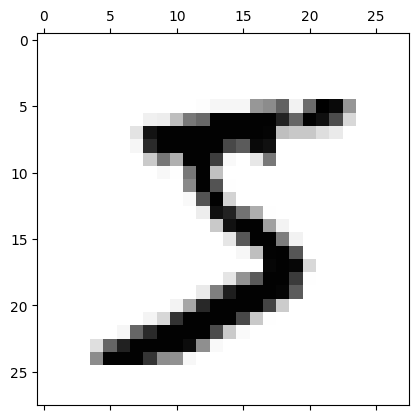

In [9]:
plt.matshow(x_train[0],cmap="Greys")

In [10]:
# scaling the data to 0-1
x_train = x_train / 255
x_test = x_test / 255

In [11]:
# Flattening
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

In [12]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
# Printing the shape of the data to observe the changes
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)

Shape of x_train: (60000, 784)
Shape of x_test: (10000, 784)


# Training the Naive Bayes Classifier

In [14]:
def train_naive_bayes(x_train, y_train):
    class_means = {}
    class_covs = {}
    class_priors = {}

    for label in np.unique(y_train):
        class_indices = np.where(y_train == label)
        class_data = x_train[class_indices]

        class_means[label] = np.mean(class_data, axis=0)
        class_variances = np.var(class_data, axis=0)
        class_covs[label] = np.diag(class_variances)
        class_priors[label] = len(class_indices[0]) / len(y_train)

    return class_means, class_covs, class_priors

In [15]:
class_means, class_covs, class_priors = train_naive_bayes(x_train, y_train)

In [16]:
for row in class_covs[1]:
            print(row)

Streaming output truncated to the last 5000 lines.
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+

In [17]:
print(f"class_means:{class_means}, class_covariance:{class_covs} , class_prior_probabilities: {class_priors}")

class_means:{0: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.47477265e-05,
       1.67509178e-04, 6.88575278e-05, 0.00000000e+00, 5.95882452e-05,
       1.62874537e-04, 7.74647188e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.0000

In [18]:
def plot_class_statistics(class_means, class_covs, class_priors):
    num_classes = len(class_means)

    for label in class_means:
        # mean
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(class_means[label].reshape(28, 28), cmap='inferno')
        plt.title(f'Mean for Digit {label}')
        plt.axis('off')

        # covariance
        plt.subplot(1, 2, 2)
        plt.imshow(class_covs[label], cmap='ocean')
        plt.title(f'Covariance for Digit {label}')
        plt.colorbar()

        plt.tight_layout()
        plt.show()

        print(f'Prior probability for class {label}: {class_priors[label]:.4f}')


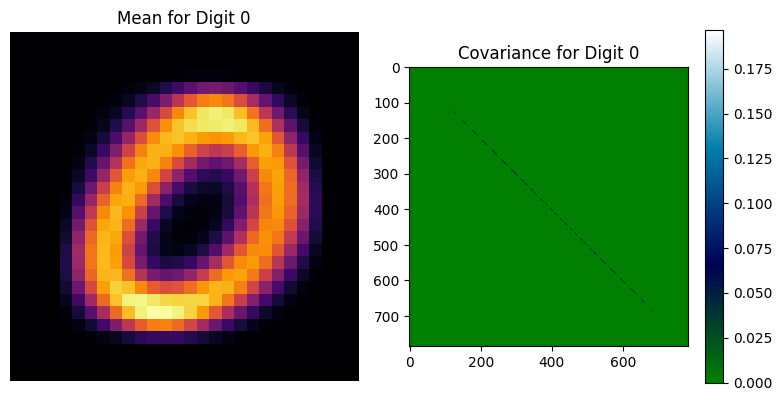

Prior probability for class 0: 0.0987


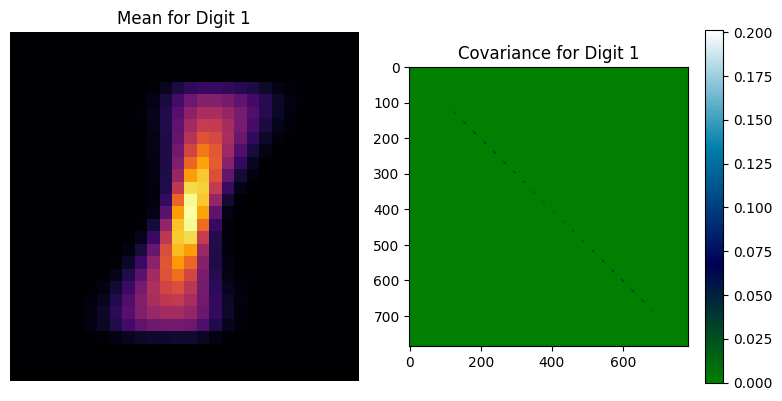

Prior probability for class 1: 0.1124


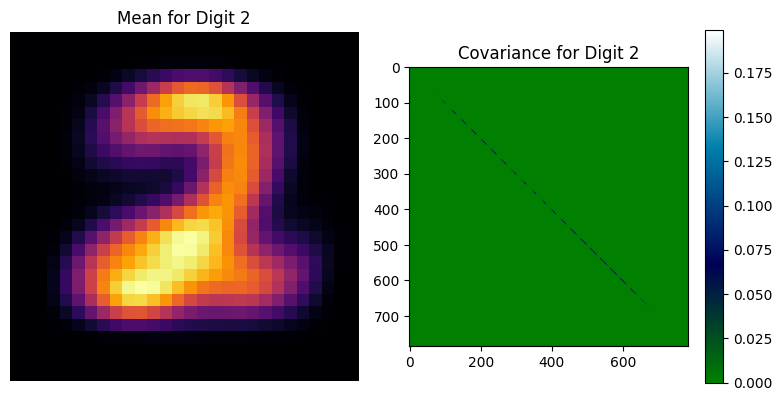

Prior probability for class 2: 0.0993


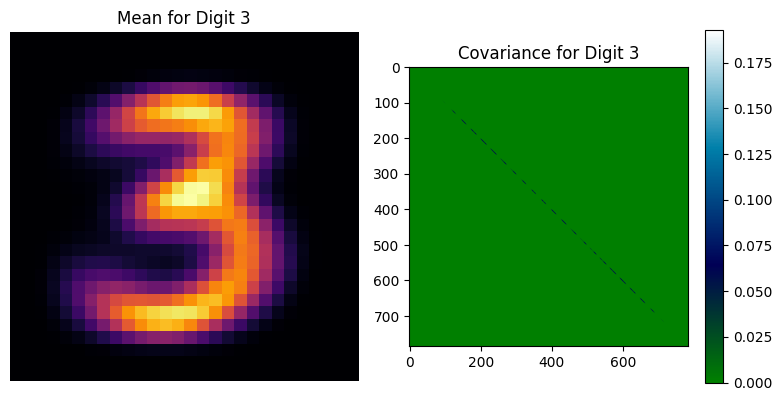

Prior probability for class 3: 0.1022


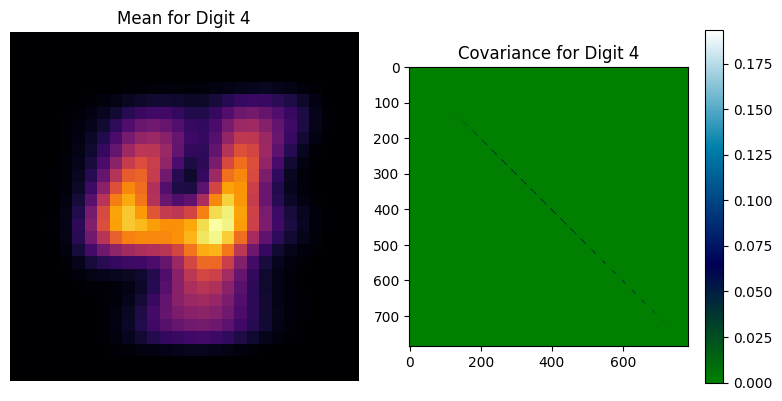

Prior probability for class 4: 0.0974


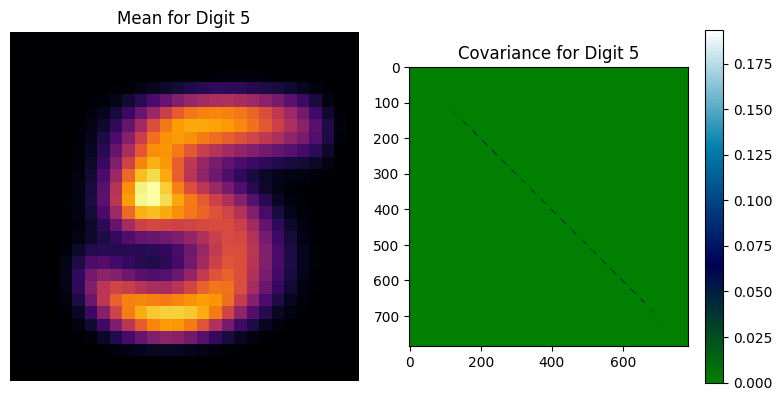

Prior probability for class 5: 0.0903


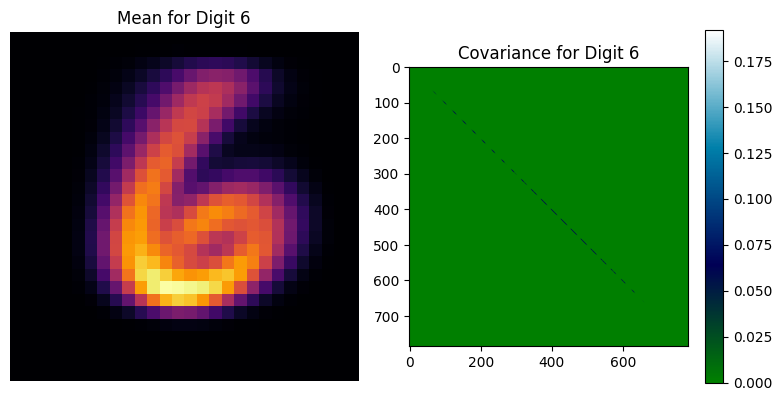

Prior probability for class 6: 0.0986


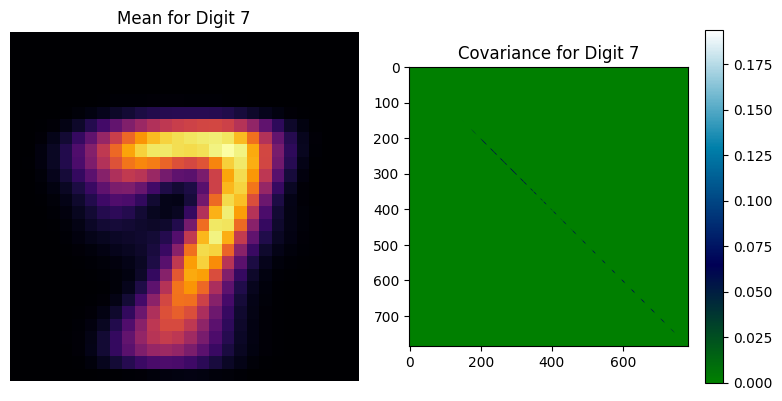

Prior probability for class 7: 0.1044


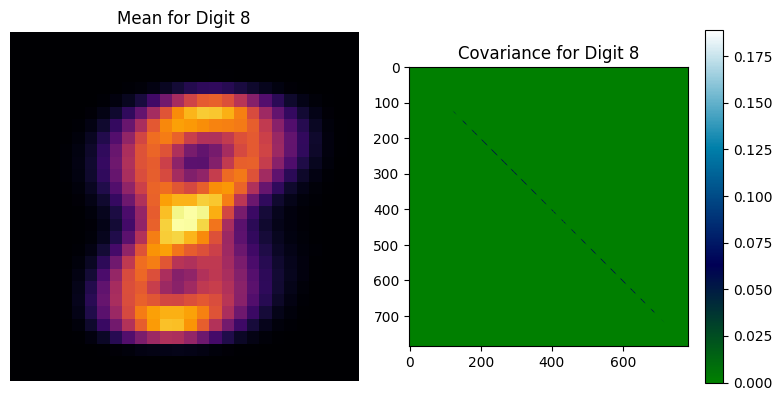

Prior probability for class 8: 0.0975


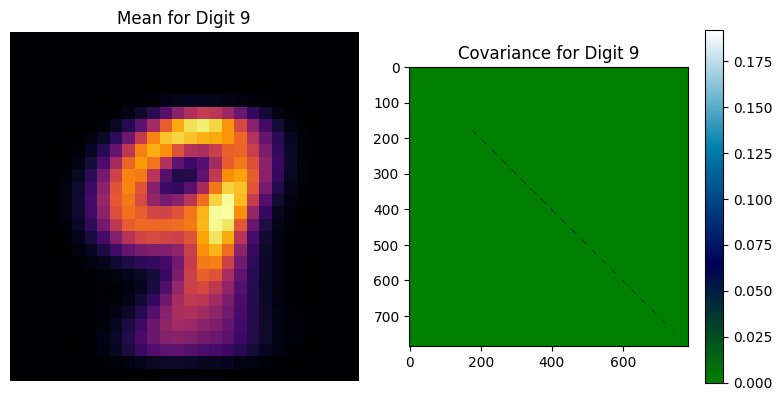

Prior probability for class 9: 0.0992


In [19]:
plot_class_statistics(class_means, class_covs, class_priors)

In [20]:
from scipy.stats import multivariate_normal

def predict_naive_bayes(x_test, class_means, class_covs, class_priors):
    num_classes = len(class_means)
    num_samples = len(x_test)
    predicted_labels = []


    mvn_objects = {}
    for label in class_means:
        mvn_objects[label] = multivariate_normal(mean=class_means[label], cov=class_covs[label], allow_singular=True)


    mvn_logpdfs = np.zeros((num_classes, num_samples))
    for label in class_means:
        mvn_logpdfs[label] = np.log(class_priors[label]) + mvn_objects[label].logpdf(x_test)


    predicted_labels = np.argmax(mvn_logpdfs, axis=0)

    return predicted_labels


In [21]:
y_pred = predict_naive_bayes(x_test, class_means, class_covs, class_priors)


In [22]:
print("Predicted Labels for the First 10 Test Samples:")
print(y_pred[:10])

Predicted Labels for the First 10 Test Samples:
[7 2 1 0 4 1 4 9 4 7]


In [23]:
print(y_test[:10])

[7 2 1 0 4 1 4 9 5 9]


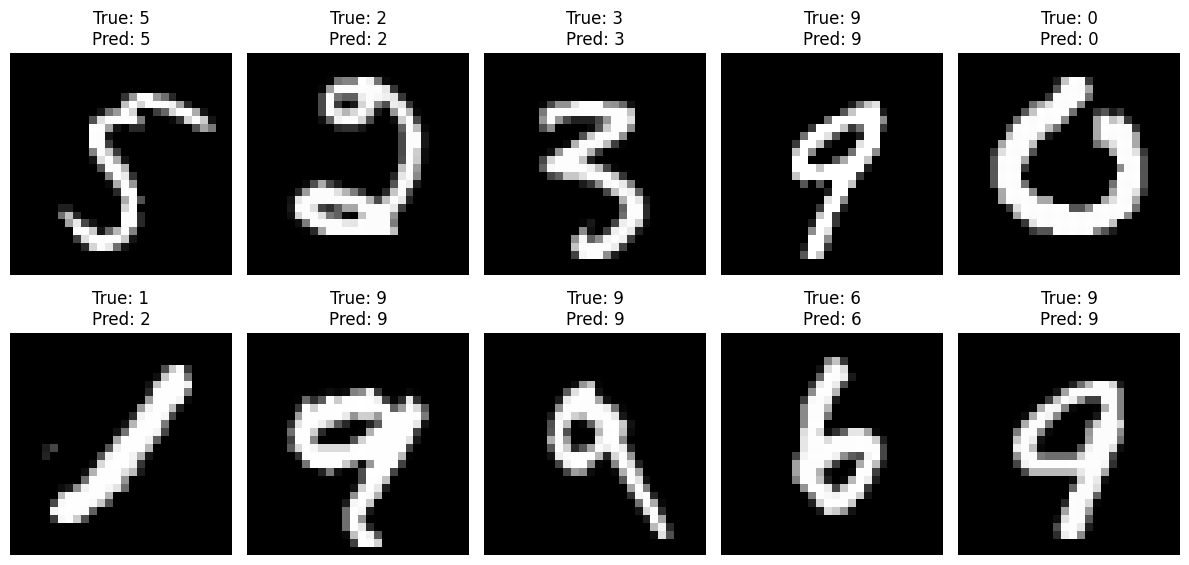

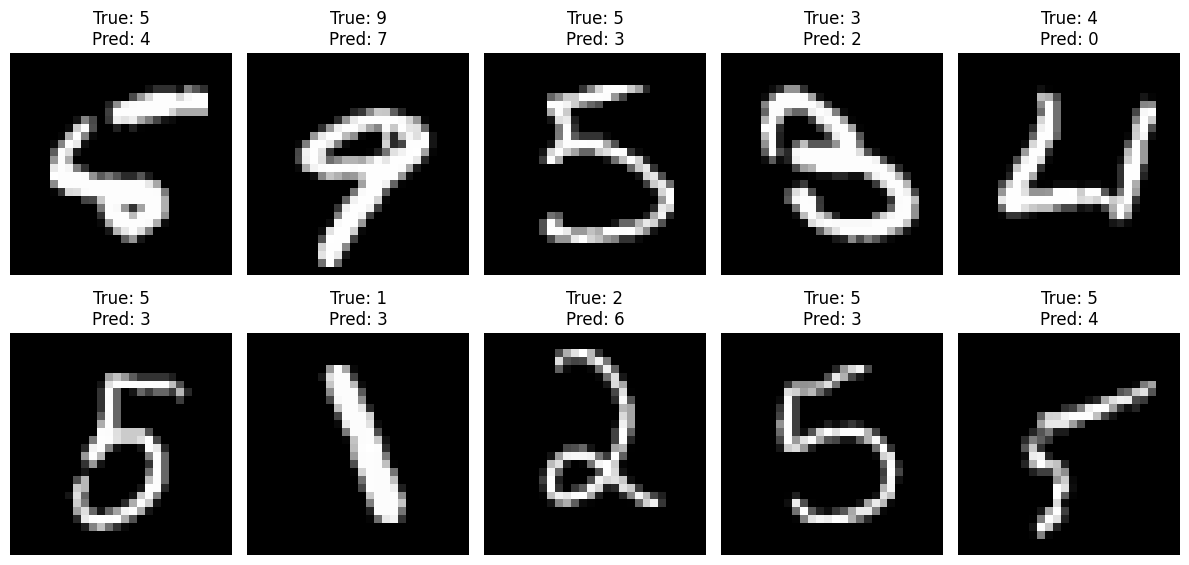

In [24]:
import random

# Select random samples
random_indices = random.sample(range(len(y_test)), 10)
sample_images = x_test[random_indices]
sample_true_labels = y_test[random_indices]
sample_pred_labels = np.array(y_pred)[random_indices]


plt.figure(figsize=(12, 6))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {sample_true_labels[i]}\nPred: {sample_pred_labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# misclassified samples
misclassified_indices = [i for i in range(len(y_test)) if y_test[i] != y_pred[i]]
misclassified_images = x_test[misclassified_indices]
misclassified_true_labels = y_test[misclassified_indices]
misclassified_pred_labels = np.array(y_pred)[misclassified_indices]

# Plot misclassified samples
plt.figure(figsize=(12, 6))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(misclassified_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {misclassified_true_labels[i]}\nPred: {misclassified_pred_labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


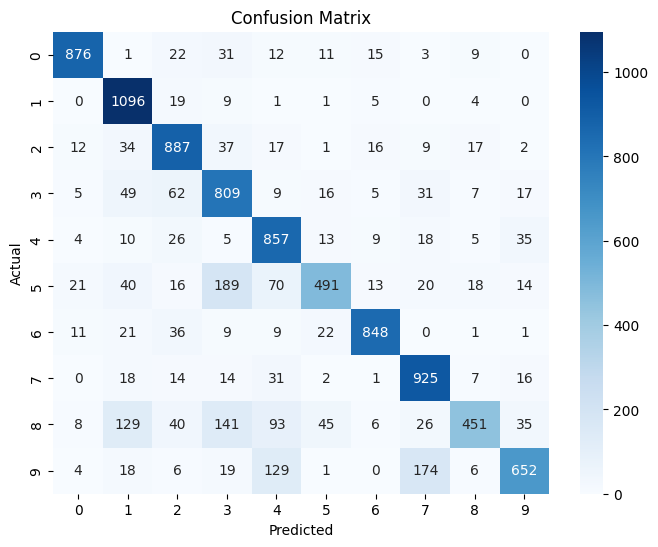

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [26]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.7892


In [27]:
from collections import Counter
from prettytable import PrettyTable

class_counts = Counter(y_test)

class_accuracies = {}

for label in np.unique(y_test):
    correct = 0
    total = class_counts[label]

    for true_label, pred_label in zip(y_test, y_pred):
        if true_label == label and true_label == pred_label:
            correct += 1

    class_accuracies[label] = correct / total


table = PrettyTable()
table.field_names = ["Digit Class", "Accuracy"]

for label, accuracy in class_accuracies.items():
    table.add_row([label, f'{accuracy:.4f}'])

print(table)


+-------------+----------+
| Digit Class | Accuracy |
+-------------+----------+
|      0      |  0.8939  |
|      1      |  0.9656  |
|      2      |  0.8595  |
|      3      |  0.8010  |
|      4      |  0.8727  |
|      5      |  0.5504  |
|      6      |  0.8852  |
|      7      |  0.8998  |
|      8      |  0.4630  |
|      9      |  0.6462  |
+-------------+----------+


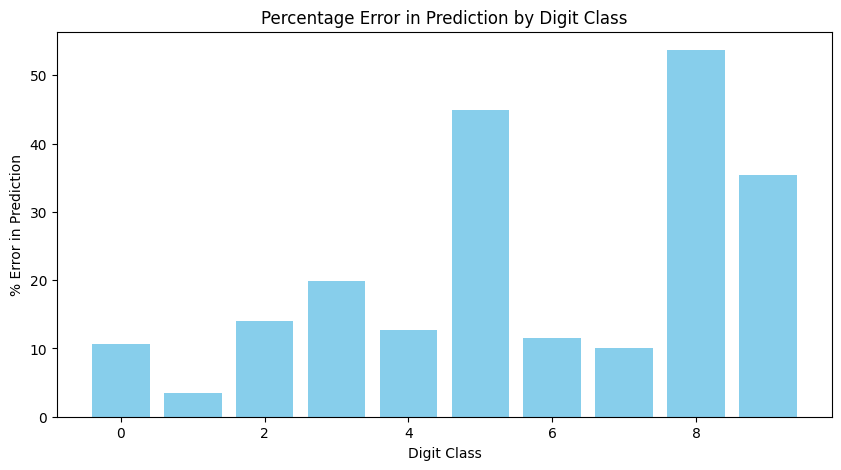

In [28]:

percentage_errors = [(1 - accuracy) * 100 for accuracy in class_accuracies.values()]
plt.figure(figsize=(10, 5))
plt.bar(class_accuracies.keys(), percentage_errors, color='skyblue')
plt.xlabel('Digit Class')
plt.ylabel('% Error in Prediction')
plt.title('Percentage Error in Prediction by Digit Class')
plt.show()
